# LUNG CANCER DETECTION PROJECT

* About the Dataset

The dataset used for this project is the Lung Cancer Detection Dataset, which is collected from the https://www.kaggle.com/datasets/jillanisofttech/lung-cancer-detection 

* Total no. of attributes:16 
* No .of instances:284 
* Attribute information: 
1. Gender: M(male), F(female)
2. Age: Age of the patient 
3. Smoking: YES=2, NO=1. 
4. Yellow fingers: YES=2 ,NO=1. 
5. Anxiety: YES=2, NO=1. 
6. Peer_pressure: YES=2, NO=1
7. Chronic Disease: YES=2, NO=1. 
8. Fatigue: YES=2 , NO=1
9. Allergy: YES=2, NO=1.
10. Wheezing: YES=2, NO=1. 
11. Alcohol: YES=2, NO=1. 
12. Coughing: YES=2, NO=1. 
13. Shortness of Breath: YES=2,NO=1. 
14. Swallowing Difficulty: YES=2, NO=1. 
15. Chest pain: YES=2, NO=1. 
16. Lung Cancer: YES, NO.

* Importing Libraries

In [39]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

* Loading Dataset

In [2]:
df = pd.read_csv("./survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


* Checking Insights of Dataset

In [4]:
df.shape

(309, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [7]:
print(df.isna().sum())
print(df.duplicated().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64
33


* There are no missing values in the data, but there are 33 duplicate values. Let's remove them

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

* Replace the Categorical Values to the numeric values

In [14]:
df["GENDER"] = df["GENDER"].replace(["M","F"],[0,1])
df["LUNG_CANCER"] = df["LUNG_CANCER"].replace(["YES","NO"],[1,0])

In [15]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


* VISULAIZATION OF DATASET

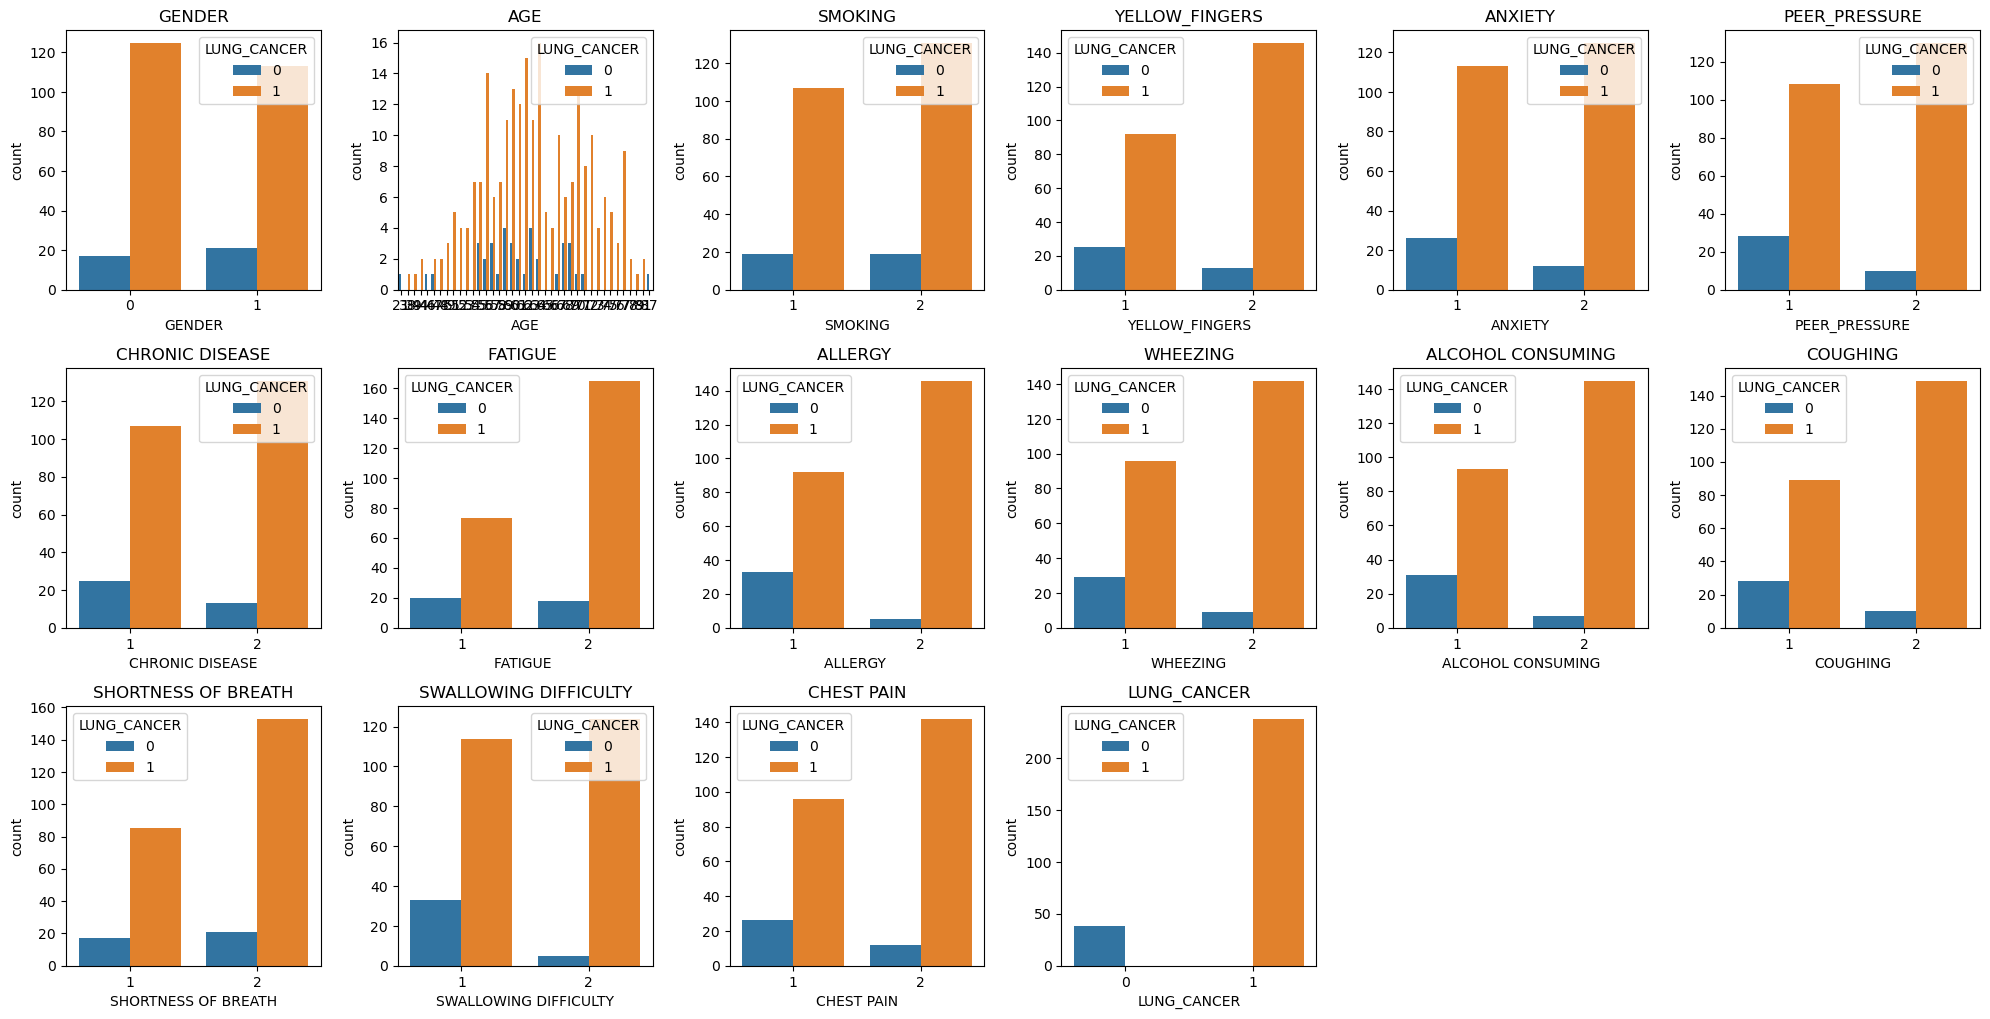

In [17]:
list=df.columns.tolist()
plt.figure(figsize=(20,20))
for i in range(len(list)):
    plt.subplot(6,6,i+1)
    plt.title(list[i])
    sns.countplot(data=df,x=list[i],hue="LUNG_CANCER")
plt.tight_layout()

* Conclusions:

* The graphs shows the number of data points for each column as it is a count plot.
* The graphs shows that people with gender Male have more chance of having lung cancer.
* The graphs shows that people with age between 40 to 60 years have more chance of having lung cancer.
* The graphs shows that people with smoking YES have more chance of having lung cancer.
* The graphs shows that people with yellow fingers NO have more chance of having lung cancer.
* The graphs shows that people with anxiety NO have more chance of having lung cancer.
* The graphs shows that people with peer pressure NO have more chance of having lung cancer.
* The graphs shows that people with chronic disease NO have more chance of having lung cancer.

<Axes: xlabel='AGE', ylabel='Density'>

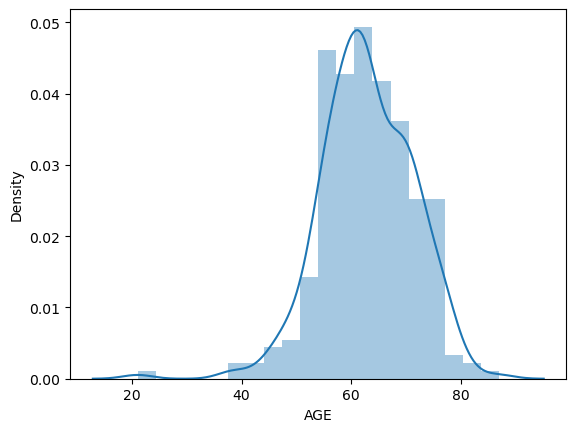

In [18]:
sns.distplot(df['AGE'])

* The graphs shows that peoples with age between 50 to 75 years have more chance of having lung cancer

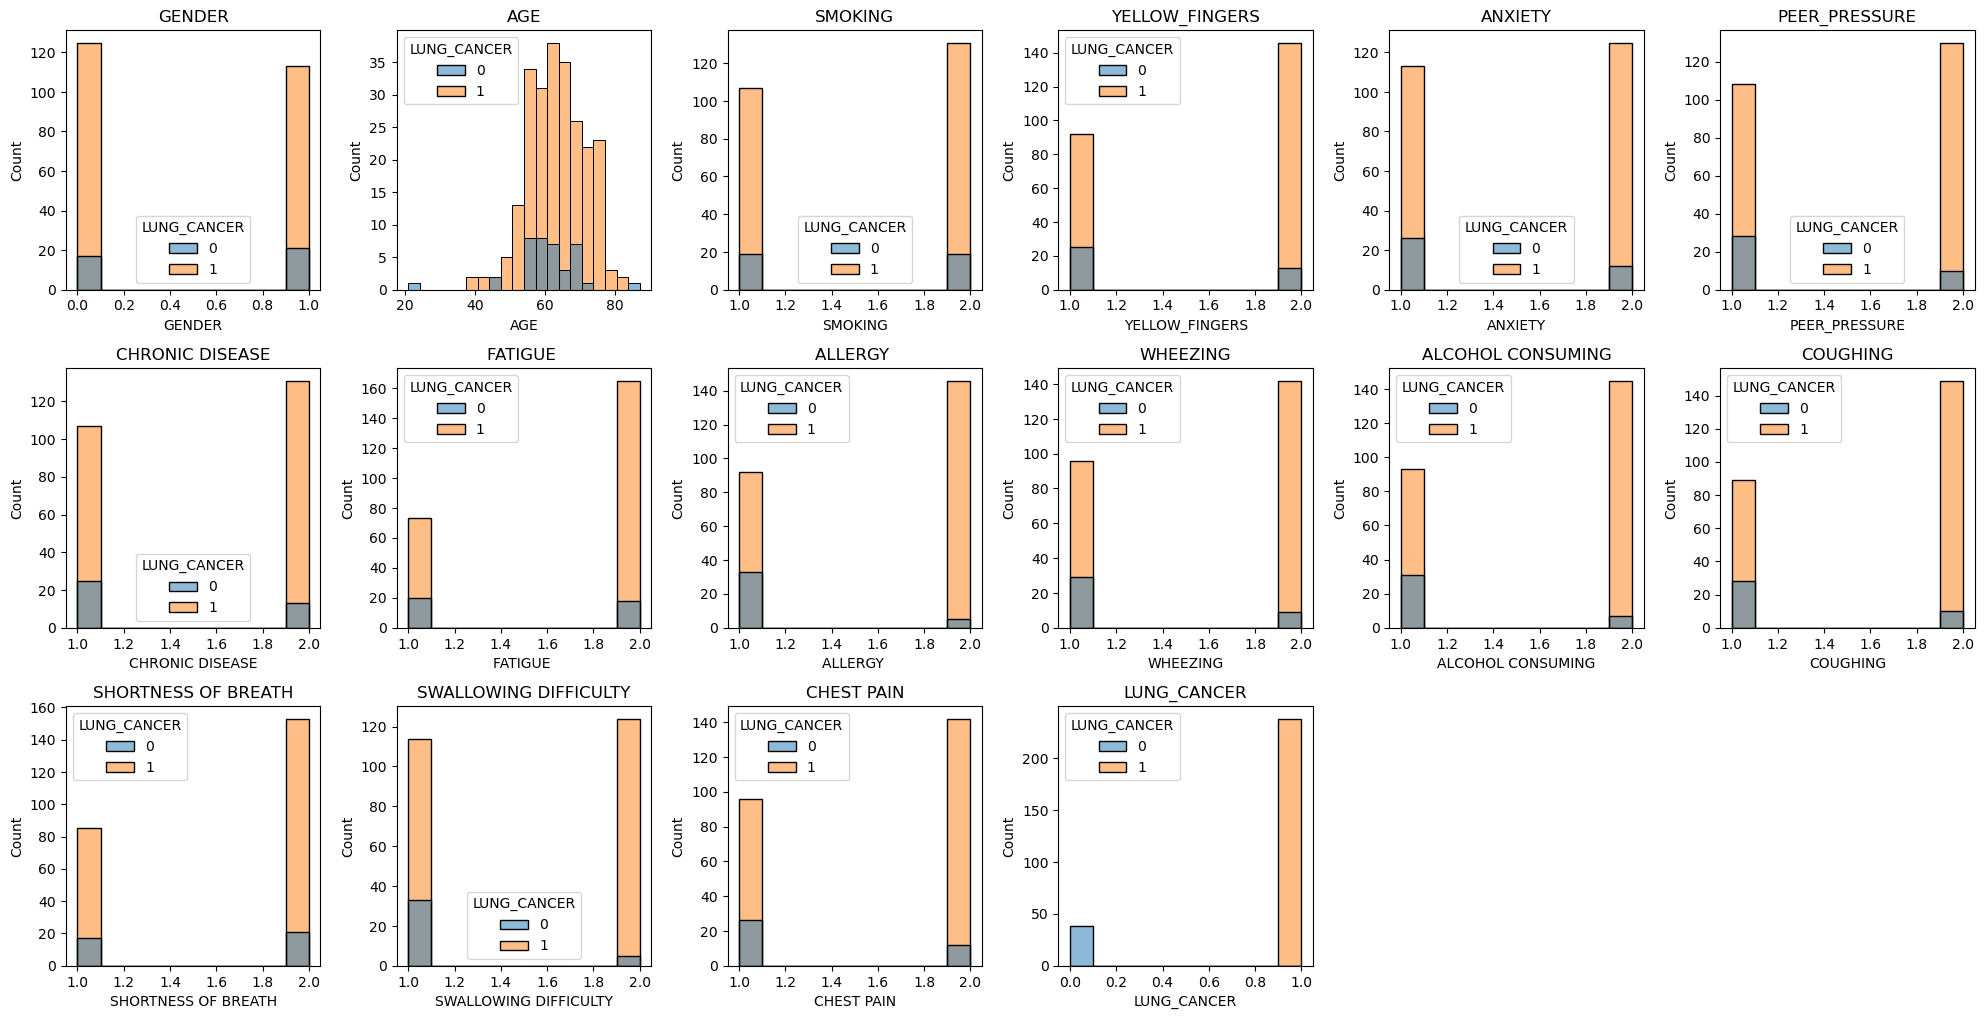

In [19]:
list=df.columns.tolist()
plt.figure(figsize=(20,20))
for i in range(len(list)):
    plt.subplot(6,6,i+1)
    plt.title(list[i])
    sns.histplot(data=df,x=list[i],hue="LUNG_CANCER")
plt.tight_layout()

* Conclusions

* The graphs shows the distribution of data points for each column as it is a histogram plot.
* The graphs shows that people with age between 50 to 75 years have more chance of having lung cancer.
* The graphs shows that people with gender Male have more chance of having lung cancer.
* The graphs shows that people with smoking YES have more chance of having lung cancer.
* The graphs shows that people with yellow fingers NO have more chance of having lung cancer.

### Pre-processing Data for model training

* Storing target colums in Y and independent variables in X

In [20]:
index_to_exclude = df.columns.get_loc('LUNG_CANCER')
X = df.iloc[:, [i for i in range(df.shape[1]) if i != index_to_exclude]].values
y = df.iloc[:,index_to_exclude].values

* Spliting the X and y for training and testing in 80 to 20 ratio

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

* Training Random Forect Classifier

In [25]:
RF_model = RandomForestClassifier(n_estimators= 150)
RF_model.fit(X_train , y_train)

RandomForestClassifier(n_estimators=150)

In [26]:
RF_model.score(X_train , y_train)

1.0

In [27]:
RF_pred = RF_model.predict(X_test)
rf=accuracy_score(y_test , RF_pred)
rf

0.8571428571428571

In [28]:
print(classification_report(y_test , RF_pred))

              precision    recall  f1-score   support

           0       0.83      0.42      0.56        12
           1       0.86      0.98      0.91        44

    accuracy                           0.86        56
   macro avg       0.85      0.70      0.74        56
weighted avg       0.85      0.86      0.84        56



* Training Support Vector Classifier

In [29]:
svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [30]:
svc.score(X_train , y_train)

0.9318181818181818

In [31]:
svc_pred = svc.predict(X_test)
svc=accuracy_score(y_test , svc_pred)
svc

0.9285714285714286

In [32]:
print(classification_report(y_test , svc_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.92      1.00      0.96        44

    accuracy                           0.93        56
   macro avg       0.96      0.83      0.88        56
weighted avg       0.93      0.93      0.92        56



* Training Decision Tree Classifier

In [33]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
dt.score(X_train , y_train)

1.0

In [35]:
dt_pred = dt.predict(X_test)
DT_acc=accuracy_score(y_test , dt_pred)
DT_acc

0.9285714285714286

In [36]:
print(classification_report(y_test , dt_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.92      1.00      0.96        44

    accuracy                           0.93        56
   macro avg       0.96      0.83      0.88        56
weighted avg       0.93      0.93      0.92        56



* Creating DataFrame of Models and their scores

In [37]:
models=pd.DataFrame({
    'models':['Random_forest','SVC','Decsion_Treee'],
    'scores':[rf,svc,DT_acc]})
models

,models,scores
0,Random_forest,0.857143
1,SVC,0.928571
2,Decsion_Treee,0.928571


* Ploting the DataFrame of models

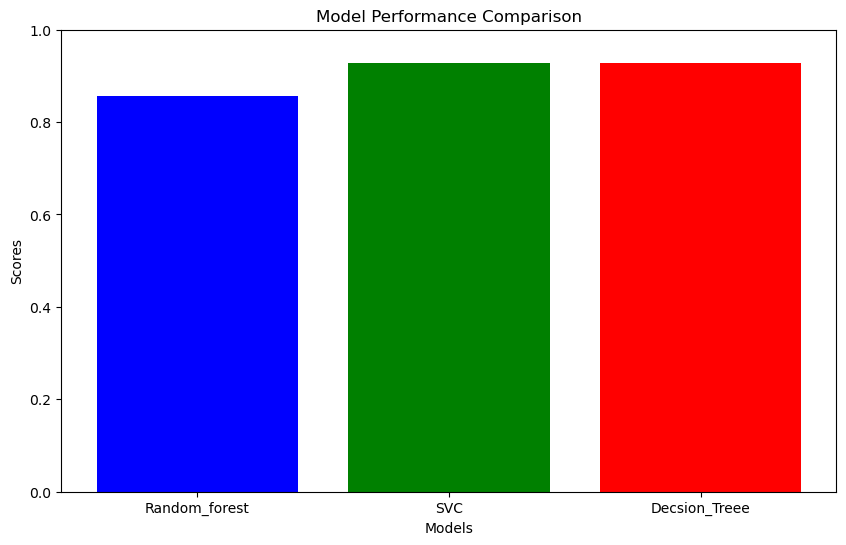

In [45]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models['models'], models['scores'], color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)  # Ensuring the y-axis goes from 0 to 1
plt.show()